<a href="https://colab.research.google.com/github/CC0R0NAD0/Segmentation-using-multiple-vision-machine-paradigms/blob/main/T2_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1354]:
from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos

#os.chdir("/content/drive/MyDrive/TEC/XIII Semestre/Sistemas_V/Mini_Proyecto") #Cuenta Adrián

Mounted at /content/drive


(287, 780, 3)


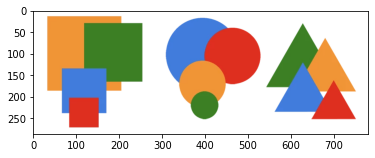

In [1355]:
import cv2  # libreria trabajo con imagenes
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla




#image = cv2.imread('imagenes/figurasColores.png')
image = cv2.imread('imagenes/img_tarea_descargada.png')


print(image.shape)

#cv2_imshow(image)




image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_plt)
plt.show()

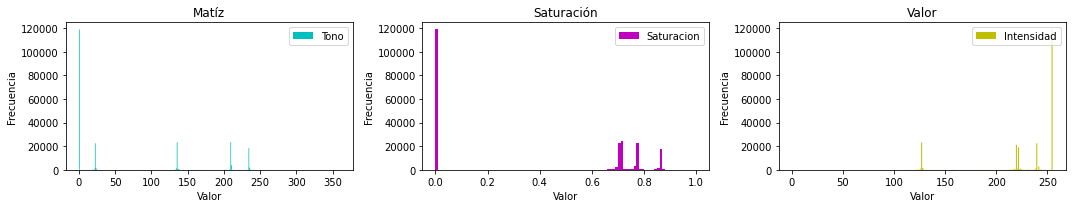

(287, 780, 3)


In [1356]:
import matplotlib.colors as colors
import numpy as np

array=np.asarray(image)
arr=(array.astype(float))/255.0
img_hsv = colors.rgb_to_hsv(arr[...,:3])
plt.subplots(figsize=(15, 3))

lu1=img_hsv[...,0].flatten()
plt.subplot(1,3,1)
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='c', label='Tono')
plt.title("Matíz")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu2=img_hsv[...,1].flatten()
plt.subplot(1,3,2)                  
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='m', label='Saturacion')
plt.title("Saturación")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu3=img_hsv[...,2].flatten()
plt.subplot(1,3,3)                  
plt.hist(lu3*255,bins=256,range=(0.0,255.0),histtype='stepfilled', color='y', label='Intensidad')
plt.title("Valor")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()

print(img_hsv.shape)

65.25490196078431
124.48627450980392
220.86274509803923


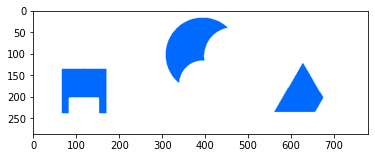

(198050,)


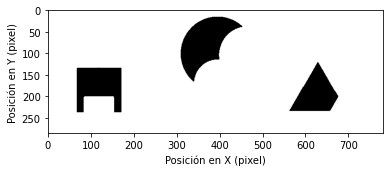

In [1357]:
from types import new_class
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]

img_rgb = arr[...,:3]
R = img_rgb[...,2]
G = img_rgb[...,1]
B = img_rgb[...,0]

h_new = h
s_new = s
v_new = v

#print(256*R.max())
#print(360 * h.mean())
print(256*R[50][400])
print(256*G[50][400])
print(256*B[50][400])


h_img = image.shape[0]
w_img = image.shape[1]


bin_image = np.ones((h_img,w_img))
posic_object = []


val_color1 =  235  #ROJO
val_sat1 = 0.4
por_desvi1 = 0.05


val_color2 =  210 #AMARILLO
val_sat2 = 0.4
por_desvi2 = 0.05


val_color3 =  135  #VERDE
val_sat3 = 0.4
por_desvi3 = 0.05


val_color4 =  25  #AZUL
val_sat4 = 0.4
por_desvi4 = 0.05

for i in range(h_img):
    for j in range(w_img):
      # if ( ( ( val_color1 - (360*por_desvi1) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi1) ) )   ): # and  (s[i,j] > val_sat1 )  ):
      #   #if (   ( (256 * R[i,j]) > 115 ) and ( (256 * G[i,j]) > 128) and ( (256 * B[i,j]) < 128)):
      #   bin_image[i,j] = 0
      #   h_new[i,j] = val_color1/360.0
      #   s_new[i,j] = 1.0
      #   v_new[i,j] = 1.0
      #   posic_object.append(image[i,j,0])

      # if ( ( ( val_color2 - (360*por_desvi2) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi2) ) )  ): #  and  (s[i,j] > val_sat2 )  ):
      #   bin_image[i,j] = 0
      #   s_new[i,j] = 1.0
      #   h_new[i,j] = val_color2/360.0
      #   v_new[i,j] = 1.0

      # if ( ( ( val_color3 - (360*por_desvi3) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi3) ) )  ): # and  (s[i,j] > val_sat2 )  ):
      #   bin_image[i,j] = 0
      #   s_new[i,j] = 1.0
      #   h_new[i,j] = val_color3/360.0
      #   v_new[i,j] = 0.6

      if ( ( ( val_color4 - (360*por_desvi4) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi4) ) )  ): # and  (s[i,j] > val_sat2 )  ):
        bin_image[i,j] = 0
        s_new[i,j] = 1.0
        h_new[i,j] = val_color4/360.0
        v_new[i,j] = 1.0
      
      # elif (   0. <= v[i,j]  ):
      #   bin_image[i,j] = 1
      #   s_new[i,j] = 0.0
      #   h_new[i,j] = 160/360.0
      #   v_new[i,j] = 1.0

      else:
            bin_image[i,j] = 1
            h_new[i,j] = 160/360
            v_new[i,j] = 1.0
            s_new[i,j] = 0.0
            posic_object.append(image[i,j,0])


recolor = img_hsv
recolor[...,0] = h_new
recolor[...,1] = s_new
recolor[...,2] = v_new



#new_color = cv2.merge([h_new, s_new, v_new])
new_color = colors.hsv_to_rgb(recolor[...,:3])


new_color_sh = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)
#cv2.imwrite('color_img.jpg', recolor)
plt.imshow(new_color_sh)


#plt.show()
plt.imsave("out.png",new_color_sh)
#plt.close()


plt.show()
#****************************************************

# recolor_rgb = arr[...,:3]
# recolor_rgb[...,0] = h_new
# recolor_rgb[...,1] = s_new
# recolor_rgb[...,2] = v_new



# #new_color = cv2.merge([h_new, s_new, v_new])
# new_color = colors.hsv_to_rgb(recolor[...,:3])


# new_color = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)
# #cv2.imwrite('color_img.jpg', recolor)
# plt.imshow(new_color)


# plt.show()



#****************************************************
posic_object = np.array(posic_object)
print(posic_object.shape)


imgplot_BN=plt.imshow(bin_image, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")


plt.show()

Text(0, 0.5, 'Posición en Y (pixel)')

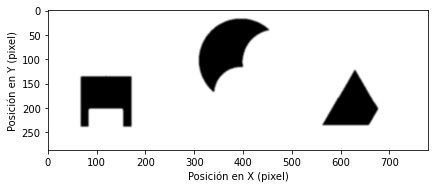

In [1358]:
# Se aplica un filtro Gauss a la imagen, para que las transiciones sean más suaves
gauss = cv2.GaussianBlur(bin_image, (5,5)  , 2) # el último parámetro de esta función
                                         # determina que tanto se difunina la imagen                                  
plt.subplots(figsize=(15, 4)) # tamaño de imagen
plt.subplot(1,2,1) # tamaño 1 fila,2 columnas, columna 1
plt.imshow(gauss, cmap=plt.cm.gray)     # Muestra la imagen
#plt.title("Imagen filtrada")
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")

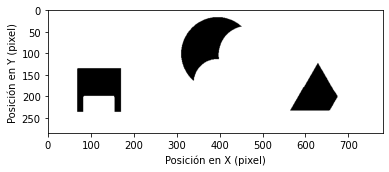

In [1359]:
filtrada = np.ones((h_img,w_img))
pas_bin = bin_image
for i in range(h_img):
    for j in range(w_img):
        if (    pas_bin[i,j] == 0 ):
          if( (  1 < i < (h_img-1)  )  and  ( 1 < j < (w_img-1)) ):
            filtrada[i,j] = max(  pas_bin[i-1,j] ,
                                  pas_bin[i+1,j] ,
                                  pas_bin[i,j-1] ,
                                  pas_bin[i,j+1] ,
                                  
                                  pas_bin[i-1,j-1] ,
                                  pas_bin[i-1,j+1] ,
                                  pas_bin[i+1,j-1] ,
                                  pas_bin[i+1,j+1] )


        else:
            filtrada[i,j] = 1

imgplot_BN=plt.imshow(filtrada, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")


plt.imsave("out_gray_filtrada.png",filtrada, cmap=plt.cm.gray )
plt.show()


8
4
11


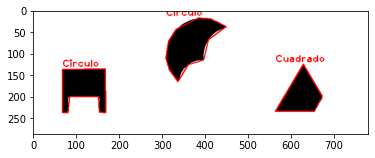

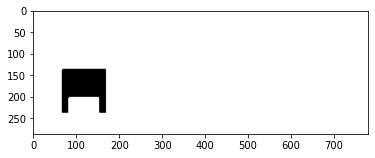

In [1360]:
#img_reload = cv2.imread('out.png')
img_reload = cv2.imread('out_gray_filtrada.png')


gray = cv2.cvtColor(img_reload, cv2.COLOR_BGR2GRAY)


canny = cv2.Canny( gray , 10, 150  )
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)


cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4







for c in cnts:
  epsilon = 0.01*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  print(len(approx))
  x,y,w,h = cv2.boundingRect(approx)
  if len(approx)==3:
    cv2.putText(img_reload,'Triangulo', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
  if len(approx)==4:
    cv2.putText(img_reload,'Cuadrado', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
  else:
    cv2.putText(img_reload,'Circulo', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
plt.imshow(img_reload, cmap=plt.cm.gray)
plt.show()




encontrado = np.ones((h_img,w_img))
#cv2.drawContours(encontrado, [cnts[0]], 0, (0,255,255),2)
cv2.fillPoly(encontrado, pts =[cnts[0]], color=(0,0,0))
plt.imshow(encontrado, cmap=plt.cm.gray)
plt.show()





# epsilon = 0.1*cv2.arcLength(cnts[2],True)
# approx = cv2.approxPolyDP(cnts[2],epsilon,True)
# print(len(approx))
# x,y,w,h = cv2.boundingRect(approx)
# if len(approx)==3:
#   cv2.putText(encontrado,'Triangulo', (x,y-5),1,1.5,(255,0,0),2)
#   cv2.drawContours(encontrado, [approx], 0, (255,0,0),2)
# if len(approx)==4:
#   cv2.putText(encontrado,'Cuadrado', (x,y-5),1,1.5,(255,0,0),2)
#   cv2.drawContours(encontrado, [approx], 0, (255,0,0),2)
# else:
#   cv2.putText(image,'Circulo', (x,y-5),1,1.5,(255,0,0),2)
#   cv2.drawContours(encontrado, [approx], 0, (255,0,0),2)
# plt.imshow(encontrado, cmap=plt.cm.gray)
# plt.show()








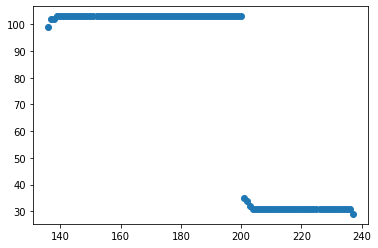

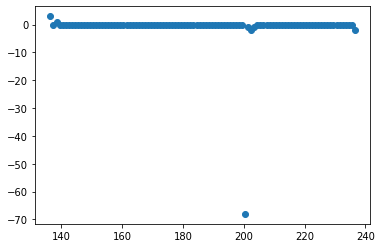

-0.693069306930693
[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -68, -1, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2]
-1


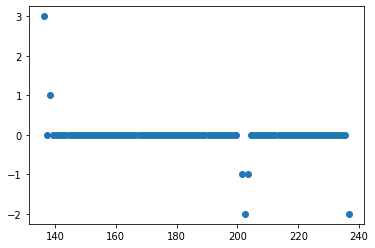

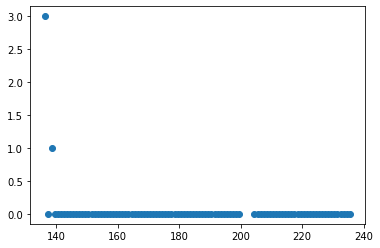


**RESULTADOS** 

-0.02
0.041666666666666664
Cuadro


In [1361]:
#GRADIENTE VERTICAL COMPLETO
num_fila = []
fila_len = []

#print(len(fila_len))

for i in range(h_img):
  fila_pri = []
  for j in range(w_img):
    if (    encontrado[i,j] == 0 ):
      fila_pri.append(j)
  if( len(fila_pri) != 0):
    fila_len.append(len(fila_pri))
    num_fila.append(i)


plt.scatter(num_fila , fila_len)
plt.show()


#SI LA LINEA SIGUIENTE ES MAYOR INCLUIRLA**********************************************************************
# pos_num_fila = []
# pos_fila_len = []


# for i in range(len(fila_len)-1):
#   if(fila_len[i] <= fila_len[i+1] ):
#     pos_fila_len.append(fila_len[i])
#     pos_num_fila.append(num_fila[i])


# plt.scatter(pos_num_fila , pos_fila_len)
# plt.show()



#DERIVADA************************************


deriva_y = []
deriva_x = []

for i in range(len(fila_len)-1):
  deriva_x.append((num_fila[i+1] + num_fila[i])/2)
  deriva_y.append((fila_len[i+1] - fila_len[i]))

  
plt.scatter(deriva_x , deriva_y)
plt.show()


print(np.mean(deriva_y))
print(deriva_y)
print(round(np.mean(deriva_y)))



#filtrar puntos extraños*************************


deriva_y_f = []
deriva_x_f = []
rango = (max(deriva_y) - min(deriva_y) ) * 0.5



for i in range(len(deriva_y)):
  if ( ( np.median(deriva_y) - rango) <= deriva_y[i] <=  ( np.median(deriva_y) + rango ) ):
    deriva_x_f.append(deriva_x[i])
    deriva_y_f.append(deriva_y[i])


plt.scatter(deriva_x_f , deriva_y_f)
plt.show()





#pendiente positiva*************************************************************

deriva_y_pos = []
deriva_x_pos = []

for i in range(len(deriva_y_f)):
  if ( deriva_y_f[i] >= 0)  :
    deriva_x_pos.append(deriva_x_f[i])
    deriva_y_pos.append(deriva_y_f[i])

  
plt.scatter(deriva_x_pos , deriva_y_pos)
plt.show()





#print resultado
print("\n**RESULTADOS** \n")
print(np.mean(deriva_y_f))
print(np.mean(deriva_y_pos))


# print(np.median(deriva_y_pos))
# print(deriva_y_pos)
# print(round(np.mean(deriva_y_pos)))


# def split_list(a_list):
#     half = len(a_list)//2
#     return a_list[:half], a_list[half:]

# B, C = split_list(deriva_y_pos)
# print(B)
# print(C)

# print(np.mean(B))
# print(np.mean(C))
# print("\n")
# print(np.median(B))
# print(np.median(C))



if ( 0 <= (np.mean(deriva_y_pos)) < 0.5 ):
  print("Cuadro")
if ( 0.5 <= (np.mean(deriva_y_pos))<= 1.2):
  print("Triangulo")
if ( 1.2 < (np.mean(deriva_y_pos))):
  print("Circulo")


# #FILTRO MEDIA MOVIL*****************************************************

# deriva_y_mm = []
# deriva_x_mm = []
# media_movil = 10

# for j in range(0, len(deriva_y)-media_movil, 1):
#   result_mm = 0
#   for i in range(media_movil-1):
#     result_mm = result_mm + (deriva_y[j + i])

  
#   deriva_y_mm.append(result_mm/media_movil)
#   deriva_x_mm.append(deriva_x[j])

  
# plt.scatter(deriva_x_mm , deriva_y_mm)
# plt.show()

# print(np.mean(deriva_y_mm))
# print(deriva_y_mm)
# print(round(np.mean(deriva_y_mm)))



# #**************************************************************************


# n, bins, patches =plt.hist(deriva_y_mm,bins=50,range=(-5.0,5.0),histtype='stepfilled', color='y', label = "")


# plt.show()

# print(max(n))
# print(max(patches))

In [1362]:
# encontrado = np.ones((h_img,w_img))
# cv2.drawContours(encontrado, [cnts[0]], 0, (0,255,255),2)
# cv2.fillPoly(encontrado, pts =[cnts[2]], color=(0,0,0))


# if round(np.mean(deriva_y_mm)) ==1:
#   cv2.putText(encontrado,'Triangulo', (x,y-5),1,1.5,(255,0,0),2)
#   #cv2.drawContours(encontrado, [approx], 0, (255,0,0),2)
# if round(np.mean(deriva_y_mm)) ==0:
#   cv2.putText(encontrado,'Cuadrado', (x,y-5),1,1.5,(255,0,0),2)
#   #cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
# else:
#   cv2.putText(encontrado,'Circulo', (x,y-5),1,1.5,(255,0,0),2)
#   #cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)

# plt.imshow(encontrado, cmap=plt.cm.gray)
# plt.show()





In [1363]:
# PRUEBA CON TRANSFORMADA DE HOUGH

# edges = cv2.Canny(image_plt,50,200)

# plt.subplots(figsize=(15, 3))
# plt.subplot(121),plt.imshow(edges,"gray")

# plt.xticks([]),plt.yticks([])
# #hough transform
# lines = cv2.HoughLinesP(edges,1,np.pi/180,30,minLineLength=100,maxLineGap=50)
# lines1 = lines[:,0,:]#Extraer como bidimensional
# for x1,y1,x2,y2 in lines1[:]:
#   cv2.line(image_plt,(x1,y1),(x2,y2),(255,0,0),1)

# plt.subplot(122),plt.imshow(image_plt)
# plt.xticks([]),plt.yticks([])